In [3]:
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from nachbarstrom import LocalImgDataProvider

In [4]:
basedir = "imgs/"
provider = LocalImgDataProvider(basedir=basedir)

In [5]:
num_imgs = 5
X, y = provider(num_imgs)
print(X.shape)
print(y.shape)
print(X.min(), X.max())

(5, 640, 640, 3)
(5, 640, 640, 2)
0.0 1.0


In [6]:
def visualize(X_aug, y_aug):
    fig, ax = plt.subplots(3, num_imgs, figsize=(15, 8))
    for idx, imgs in enumerate(zip(X_aug, y_aug)):
        original, masks = imgs
        ax[0, idx].imshow(original)
        ax[1, idx].imshow(masks[...,0].round())
        ax[2, idx].imshow(masks[...,1].round())
    plt.tight_layout()
    plt.show()

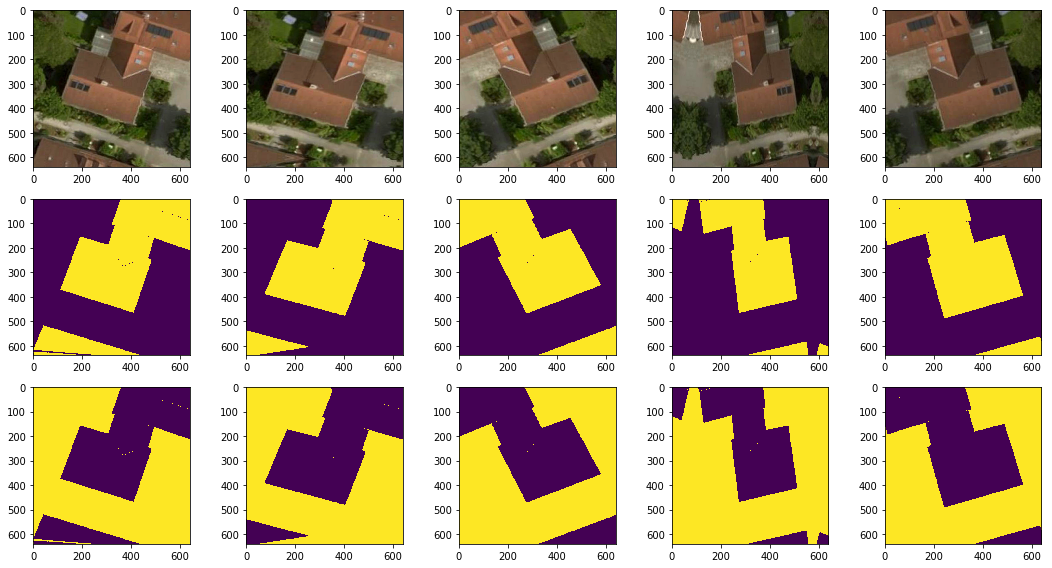

In [7]:
visualize(X, y)